In [ ]:
from utils.data_load import load_all_participants
from utils.cm_plot import plot_binary_confusion_matrix,plot_ternary_confusion_matrix,plot_continous_perclos
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import GroupKFold, cross_val_predict
from sklearn.metrics import accuracy_score,mean_squared_error

all_participants_data = load_all_participants()

X = all_participants_data.drop(
    columns=["perclos", "quantized_perclos", "Participant Name"]
)
groups = all_participants_data["Participant Name"]
cv_loso = GroupKFold(n_splits=len(groups.unique()))

y_binary_encoded = (all_participants_data["perclos"] > 0.5).astype(int)
y_ternary_encoded = all_participants_data["quantized_perclos"]
y_continuous = all_participants_data["perclos"]





Loading data for participant: 10_20151125_noon
Loading data for participant: 11_20151024_night
Loading data for participant: 12_20150928_noon
Loading data for participant: 13_20150929_noon
Loading data for participant: 14_20151014_night
Loading data for participant: 15_20151126_night
Loading data for participant: 16_20151128_night
Loading data for participant: 17_20150925_noon
Loading data for participant: 18_20150926_noon
Loading data for participant: 19_20151114_noon
Loading data for participant: 1_20151124_noon_2
Loading data for participant: 20_20151129_night
Loading data for participant: 21_20151016_noon
Loading data for participant: 2_20151106_noon
Loading data for participant: 3_20151024_noon
Loading data for participant: 4_20151105_noon
Loading data for participant: 4_20151107_noon
Loading data for participant: 5_20141108_noon
Loading data for participant: 5_20151012_night
Loading data for participant: 6_20151121_noon
Loading data for participant: 7_20151015_night
Loading data 

Binary Classification (LOSO CV) Accuracy: 0.7708671088184721


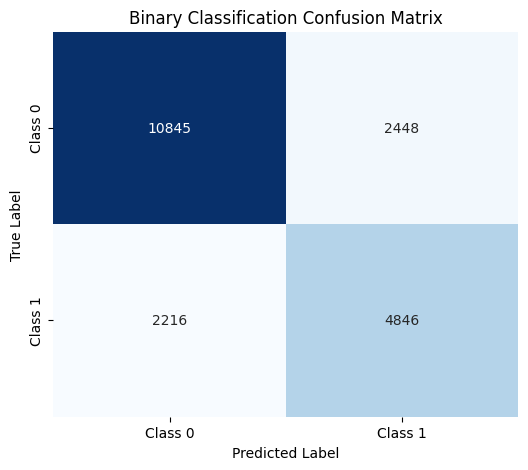

In [6]:
rf_model = RandomForestClassifier(
    n_estimators=5, class_weight="balanced", random_state=None
)

y_binary_pred_loso = cross_val_predict(
    rf_model, X, y_binary_encoded, cv=cv_loso, groups=groups
)


print(
    "Binary Classification (LOSO CV) Accuracy:",
    accuracy_score(y_binary_encoded, y_binary_pred_loso),
)
plot_binary_confusion_matrix(y_binary_encoded, y_binary_pred_loso)




Ternary Classification (LOSO CV) Accuracy: 0.5141734217636944


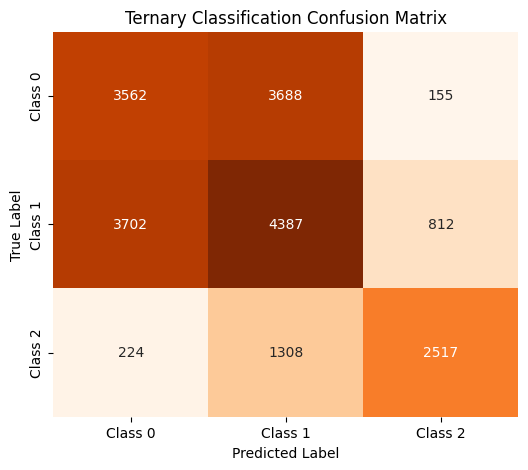

In [7]:
rf_model = RandomForestClassifier(
    n_estimators=5, class_weight="balanced", random_state=None
)
y_ternary_pred_loso = cross_val_predict(
    rf_model, X, y_ternary_encoded, cv=cv_loso, groups=groups
)


print(
    "Ternary Classification (LOSO CV) Accuracy:",
    accuracy_score(y_ternary_encoded, y_ternary_pred_loso),
)
plot_ternary_confusion_matrix(y_ternary_encoded, y_ternary_pred_loso)


In [ ]:
rf_model_reg = RandomForestRegressor(
    n_estimators=5,random_state=None
)
y_continous_pred_loso = cross_val_predict(
    rf_model_reg, X, y_continuous, cv=cv_loso, groups=groups
)
print(
    "Random Forest Regression (LOSO CV) RMSE:",
      (mean_squared_error(y_continuous, y_continous_pred_loso)**0.5)
)
plot_continous_perclos(y_continuous, y_continous_pred_loso)
